In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score



In [2]:
column_names=["City1","City2","Avg_Fare","Distance","Avg_Wkly_Psngr","Mkt_Lead_AL","Mkt_Share","Avg_Fare1","Low_Price_AL","Mkt_Share1","Price"]
air_d=pd.read_csv('airq402_data.txt', sep = '\s+', names =column_names)
air_d.head(5)



,City1,City2,Avg_Fare,Distance,Avg_Wkly_Psngr,Mkt_Lead_AL,Mkt_Share,Avg_Fare1,Low_Price_AL,Mkt_Share1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
air_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1             1000 non-null object
City2             1000 non-null object
Avg_Fare          1000 non-null float64
Distance          1000 non-null int64
Avg_Wkly_Psngr    1000 non-null float64
Mkt_Lead_AL       1000 non-null object
Mkt_Share         1000 non-null float64
Avg_Fare1         1000 non-null float64
Low_Price_AL      1000 non-null object
Mkt_Share1        1000 non-null float64
Price             1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
air_d.isnull().values.any()

False

In [6]:
len(air_d)

1000

In [9]:
air_d.drop_duplicates(keep=False, inplace=True)

In [10]:
len(air_d)

1000

In [11]:
# no duplicate data is found as the row count is same before and after.


In [21]:
print(air_d['City1'].nunique())
print(air_d['City2'].nunique())
print(air_d['Mkt_Lead_AL'].nunique())
print(air_d['Low_Price_AL'].nunique())


90
85
16
19


In [28]:
def le_preprocess():
    object_list = list(air_d.select_dtypes(include ='object').columns)
    for i in object_list:
        le = preprocessing.LabelEncoder()
        le.fit(air_d[i].unique())
        air_d[i] = le.transform(air_d[i])
        air_d[i] = air_d[i].astype('category')

In [30]:
le_preprocess()
air_d.head()

,City1,City2,Avg_Fare,Distance,Avg_Wkly_Psngr,Mkt_Lead_AL,Mkt_Share,Avg_Fare1,Low_Price_AL,Mkt_Share1,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [40]:
def outlier_mean(df):
    mylist = list(df.select_dtypes(include =['float64', 'int64']).columns)
    outlier1 = pd.DataFrame()
    outlier2 = pd.DataFrame()
    for i in mylist:
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] > df[i].mean()+3*df[i].std()])])
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] < df[i].mean()-3*df[i].std()])])
    outlier2.drop_duplicates(inplace =True)    
    return outlier2

In [41]:
temp_mean = outlier_mean(air_d)
temp_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 213 to 774
Data columns (total 11 columns):
City1             34 non-null category
City2             34 non-null category
Avg_Fare          34 non-null float64
Distance          34 non-null int64
Avg_Wkly_Psngr    34 non-null float64
Mkt_Lead_AL       34 non-null category
Mkt_Share         34 non-null float64
Avg_Fare1         34 non-null float64
Low_Price_AL      34 non-null category
Mkt_Share1        34 non-null float64
Price             34 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 8.9 KB


In [44]:
air_datafinal= pd.concat([air_d,temp_mean]).drop_duplicates(keep=False)
air_datafinal.head()

,City1,City2,Avg_Fare,Distance,Avg_Wkly_Psngr,Mkt_Lead_AL,Mkt_Share,Avg_Fare1,Low_Price_AL,Mkt_Share1,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [45]:
X= air_datafinal.drop('Avg_Fare', axis =1)
y = air_datafinal['Avg_Fare']
list(X.columns)

['City1',
 'City2',
 'Distance',
 'Avg_Wkly_Psngr',
 'Mkt_Lead_AL',
 'Mkt_Share',
 'Avg_Fare1',
 'Low_Price_AL',
 'Mkt_Share1',
 'Price']

In [49]:
def del_corr(df_Indpndnt, df_Dpndnt):
    corr_list ={}
    for i in df_Indpndnt.columns:
        corr_list[i] =df_Dpndnt.corr(df_Indpndnt[i])
        if corr_list[i]<0.1:
            print("Independent columns getting deleted are: %s" %(i))
            df_Indpndnt.drop(i, axis =1, inplace =True)
    return corr_list

In [51]:
corr_list1 = del_corr(X,y)
print(corr_list1)
X.columns

{'Distance': 0.5520146129480719, 'Avg_Fare1': 0.9811032910471462, 'Price': 0.8593621264938919}


Index(['Distance', 'Avg_Fare1', 'Price'], dtype='object')

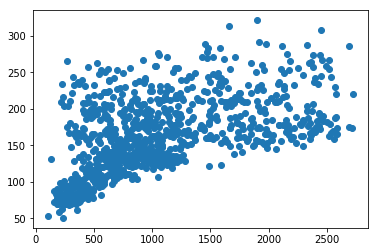

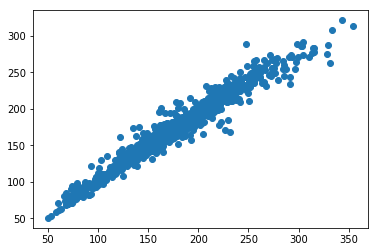

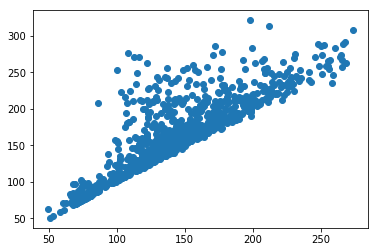

In [52]:
for i in X:
    plt.scatter(X[i],y)
    #plt.set(xlabel ='ixlabel')
    #plt.set(ylabel ='ysdflabel')
    plt.show()

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size =0.2,random_state =2)
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
print(model.coef_)
print(model.intercept_)

[0.00155706 0.75067874 0.20239681]
8.00462279418835


In [59]:
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = sqrt(mse)
r2score = r2_score(ytest, ypred)
print(mse)
print(rmse)
print(r2score)

68.3420864421014
8.266927267256039
0.9740880170797234


In [61]:
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = sqrt(mse)
r2score = r2_score(ytest, ypred)
print(mse)
print(rmse)
print(r2score)

68.3420864421014
8.266927267256039
0.9740880170797234
